In [177]:
import pickle

import numpy as np
import matplotlib.pyplot as plt
import torch
import random  

### Exploring Metadata

In [178]:
def unpickle(file): 
    
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [219]:
file_dict = unpickle(r'cifar-10-batches-py/batches.meta')
label_map = file_dict[ b'label_names']
label_map

[b'airplane',
 b'automobile',
 b'bird',
 b'cat',
 b'deer',
 b'dog',
 b'frog',
 b'horse',
 b'ship',
 b'truck']

In [180]:


file_dict = unpickle(r'cifar-10-batches-py/data_batch_1')

rbg_10k_img = file_dict[b'data'] #shape is (10000, 3072) with 
target_var = file_dict[b'labels']
 
assert set(target_var) == set(range(10))
assert rbg_10k_img.shape == (10000, 3072)

In [236]:
'''
rbg_10k_img: Contains rbg of 10k images of file data_batch_{i}   where i in [1,5]
        
        - Has shape (10000, 3072)
        - The first 1024 entries contain the red channel values, the next 1024 the green, and the final 1024 the blue.

target_var: is the target variable representing the class of the picture  
        - Has shape (10000, 1)
        - The first 1024 entries contain the red channel values, the next 1024 the green, and the final 1024 the blue.

0: airplane										
1: automobile										
2: bird										
3: cat										
4: deer										
5: dog										
6: frog										
7: horse										
8: ship										
9: truck
'''

def load_train_data():
    rbg_50k_img = []
    class_50k_img = []

    for i in range(5):
        print(f"Loading batch {i+1}...") 

        file_dict = unpickle(f'cifar-10-batches-py/data_batch_{i+1}') 
        rbg_50k_img.append(torch.tensor(file_dict[b'data'], dtype=torch.uint8))  
        class_50k_img.append(torch.tensor(file_dict[b'labels'], dtype=torch.uint8)) 

    
    rbg_50k_img = torch.cat(rbg_50k_img, dim=0)  # Shape: (50000, 3072)
    rbg_50k_img = rbg_50k_img.view(50000, 3, 32, 32)
     
    assert set(torch.cat(class_50k_img).tolist()) == set(range(10)), "class_50k_img values are not in the expected range"
    assert rbg_50k_img.shape == torch.Size([50000, 3, 32, 32])
    print("\nTrain set features shape:", rbg_50k_img.shape)    
    print(f"Test set target variable shape: ({len(class_50k_img)},1)") 

    

    return rbg_50k_img, class_50k_img


def load_test_data():
    rbg_10k_img = []
    class_10k_img = []
    print(f"\nLoading test batch...\n") 


    file_dict = unpickle(f'cifar-10-batches-py/test_batch') 
    rbg_10k_img = torch.tensor(file_dict[b'data'], dtype=torch.uint8)
    class_10k_img = torch.tensor(file_dict[b'labels'], dtype=torch.uint8)

    rbg_10k_img = rbg_10k_img.view(10000, 3, 32, 32) 
    

    assert set(class_10k_img.tolist()) == set(range(10)), "class_10k_img values are not in the expected range"
    assert rbg_10k_img.shape == torch.Size([10000, 3, 32, 32])
    print("Test set features shape:", rbg_10k_img.shape)   
    print(f"Test set target variable shape: ({len(class_10k_img)},1)") 

    return rbg_10k_img, class_10k_img


x_train, y_train = load_train_data()
x_test, y_test = load_test_data()

Loading batch 1...
Loading batch 2...
Loading batch 3...
Loading batch 4...
Loading batch 5...

Train set features shape: torch.Size([50000, 3, 32, 32])
Test set target variable shape: (5,1)

Loading test batch...

Test set features shape: torch.Size([10000, 3, 32, 32])
Test set target variable shape: (10000,1)


### Checking out a random picture with its associated tag

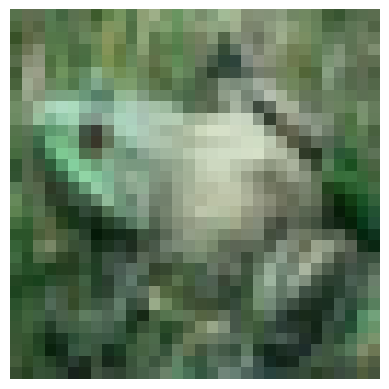

This is a b'frog' 


In [ ]:
img_no = random.randint(0, 10000)

# Assuming `rbg_50k_img` is a PyTorch tensor of shape (50000, 3, 32, 32)
img = x_test[img_no]  # Select first image

# Convert from Tensor to NumPy for plotting
img = img.permute(1, 2, 0).numpy()  # Change shape from (3, 32, 32) -> (32, 32, 3)

# Display the image
plt.imshow(img.astype("uint8"))
plt.axis("off")  # Hide axis
plt.show()
print( f'This is a {label_map[y_test[img_no]]} ')